In [1]:
pwd

'/Users/macbookpro/Dropbox/Galvanize/autoregression'

In [239]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/macbookpro/Dropbox/Galvanize/cleandata/"))
import cleandata
sys.path.append(os.path.abspath("/Users/macbookpro/Dropbox/Galvanize/autoregression/"))
import autoregression
import importlib
spec = importlib.util.spec_from_file_location("galgraphs", "/Users/macbookpro/Dropbox/Galvanize/galgraphs/galgraphs/galgraphs.py")
galgraphs = importlib.util.module_from_spec(spec)
spec.loader.exec_module(galgraphs)
import galgraphs
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

# indians diabetes

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_curve
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pandas.read_csv(url, names=names)
array = df.values
df = cleandata.rename_columns(df)
df.head(3)
plt.rcParams.update({'figure.max_open_warning': 0})

## Continuous

[autoreload of autoregression failed: Traceback (most recent call last):
  File "/Users/macbookpro/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macbookpro/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/macbookpro/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/macbookpro/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "

df columns: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class', 'age']
df columns after transform: ['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'class_spline_linear', 'class_spline_0', 'class_spline_1', 'class_spline_2', 'age']
y variable: "age" is continuous
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LR: mean=-222.217221 std=402.165805


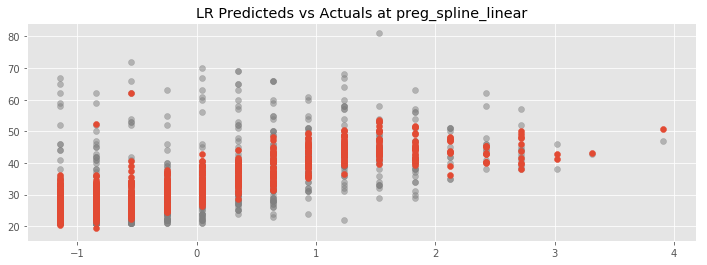

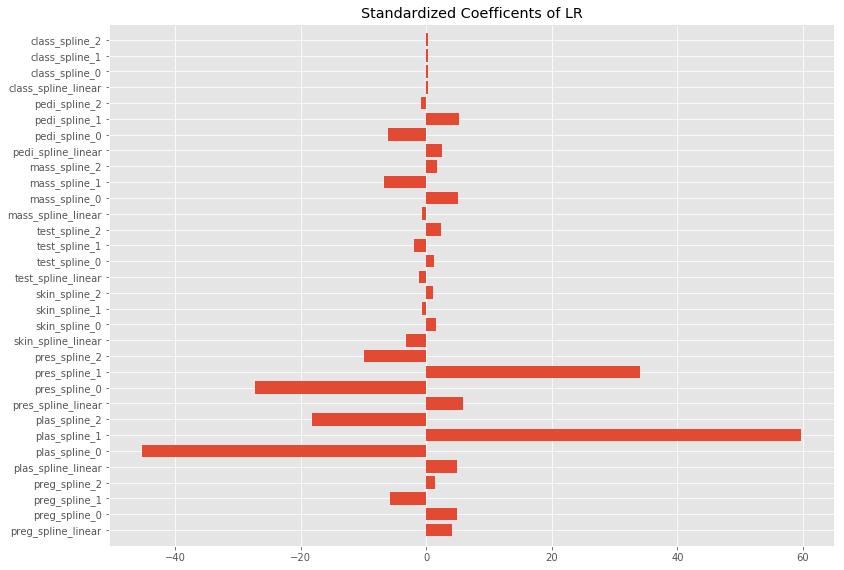

KeyboardInterrupt: 

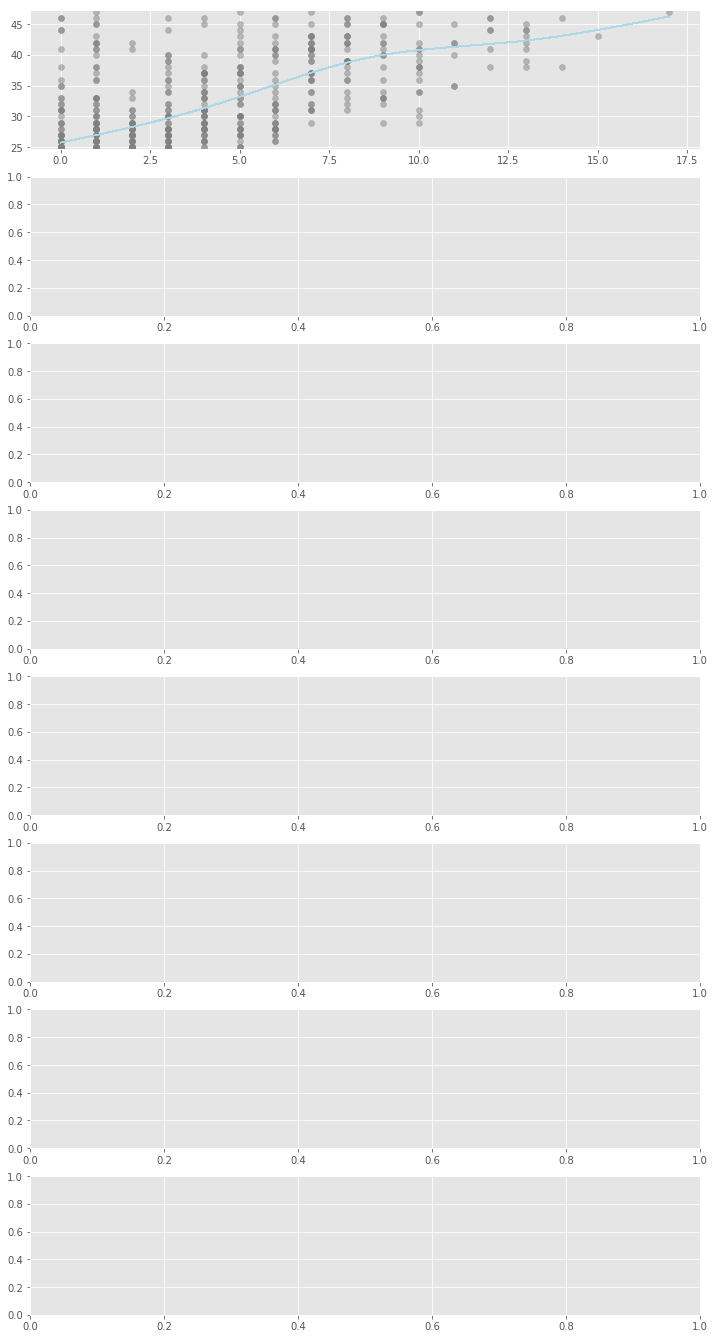

In [257]:
names1, results1, models1, pipeline1 = autoregression.compare_predictions(df,'age', univariates=False)

In [ ]:
ridge_regularization_strengths = np.logspace(np.log10(0.000001), np.log10(10000), num=100)

ridge_regressions = []
for alpha in ridge_regularization_strengths:
    ridge = Ridge(alpha=alpha)
    ridge.fit(balance_train, y_train)
    ridge_regressions.append(ridge)

In [ ]:
def plot_solution_paths(ax, regressions):
    alphas = [np.log10(ridge.alpha) for ridge in regressions]
    coeffs = np.concatenate([ridge.coef_.reshape(1, -1) 
                             for ridge in regressions])
    for idx in range(coeffs.shape[1]):
        ax.plot(alphas, coeffs[:, idx])
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Estiamted Coefficient")
    ax.set_title("Coefficient Paths")

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
plot_solution_paths(ax, ridge_regressions)

## Categorical

  0%|          | 0/2 [00:00<?, ?it/s]

df columns: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df columns after transform: ['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'age_spline_linear', 'age_spline_0', 'age_spline_1', 'age_spline_2', 'class']
y variable: "class" is categorical
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=Fals

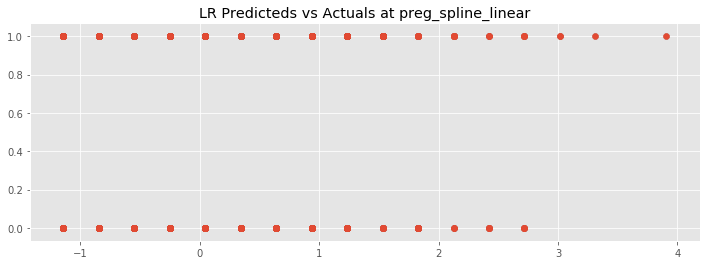

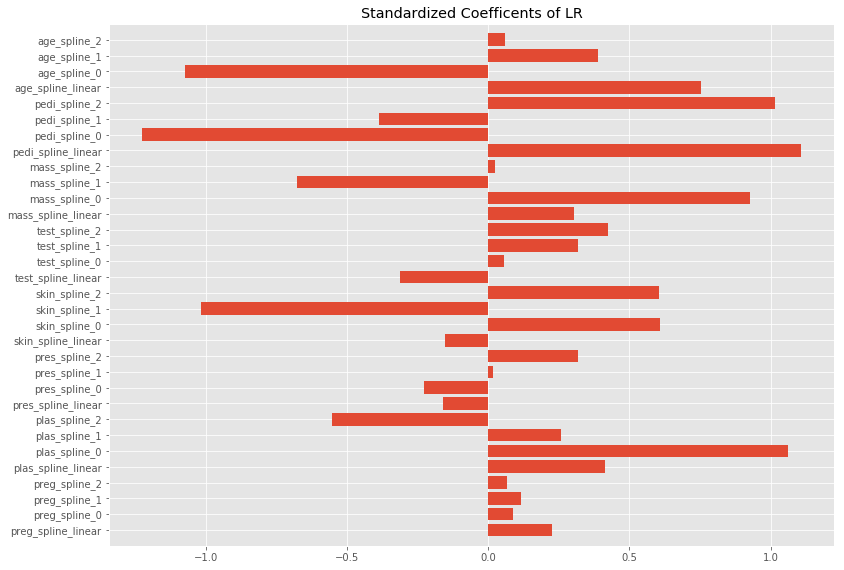

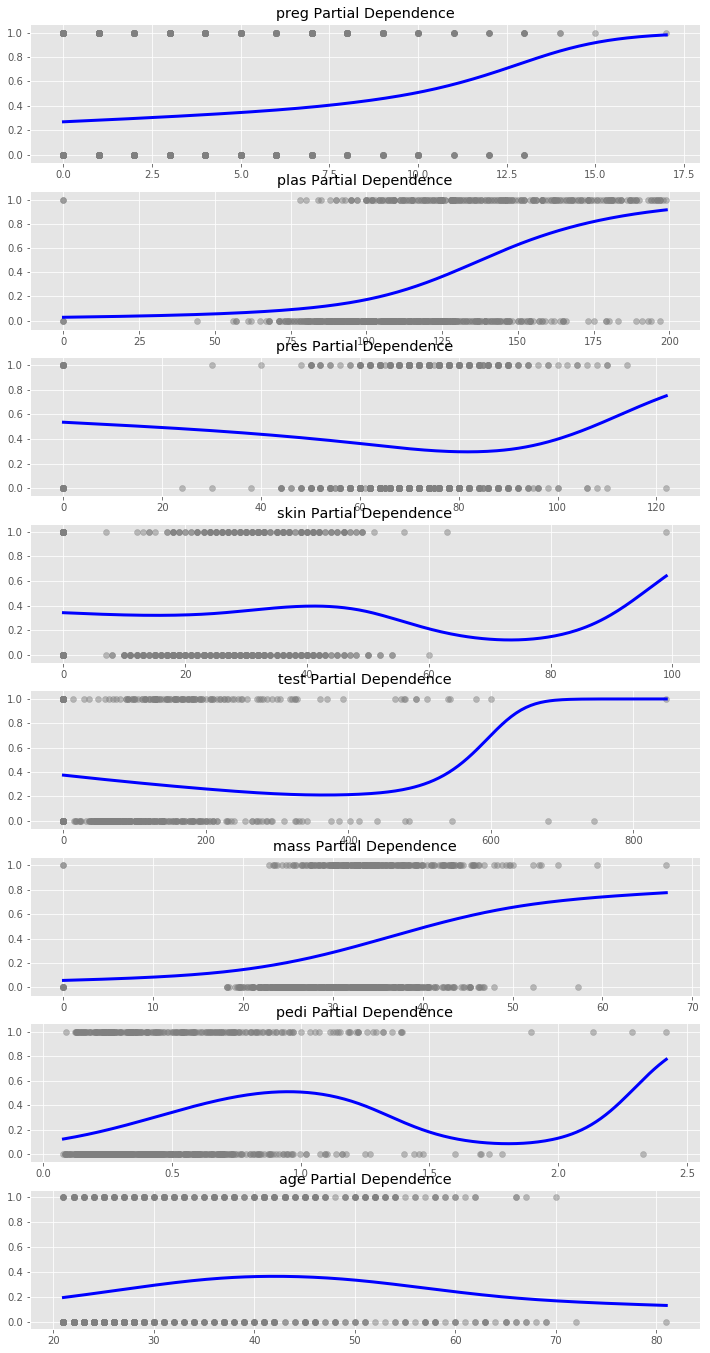

 50%|█████     | 1/2 [00:40<00:40, 40.29s/it]

LR: MSE = 0.21484375
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DT: mean=0.691353 std=0.062010


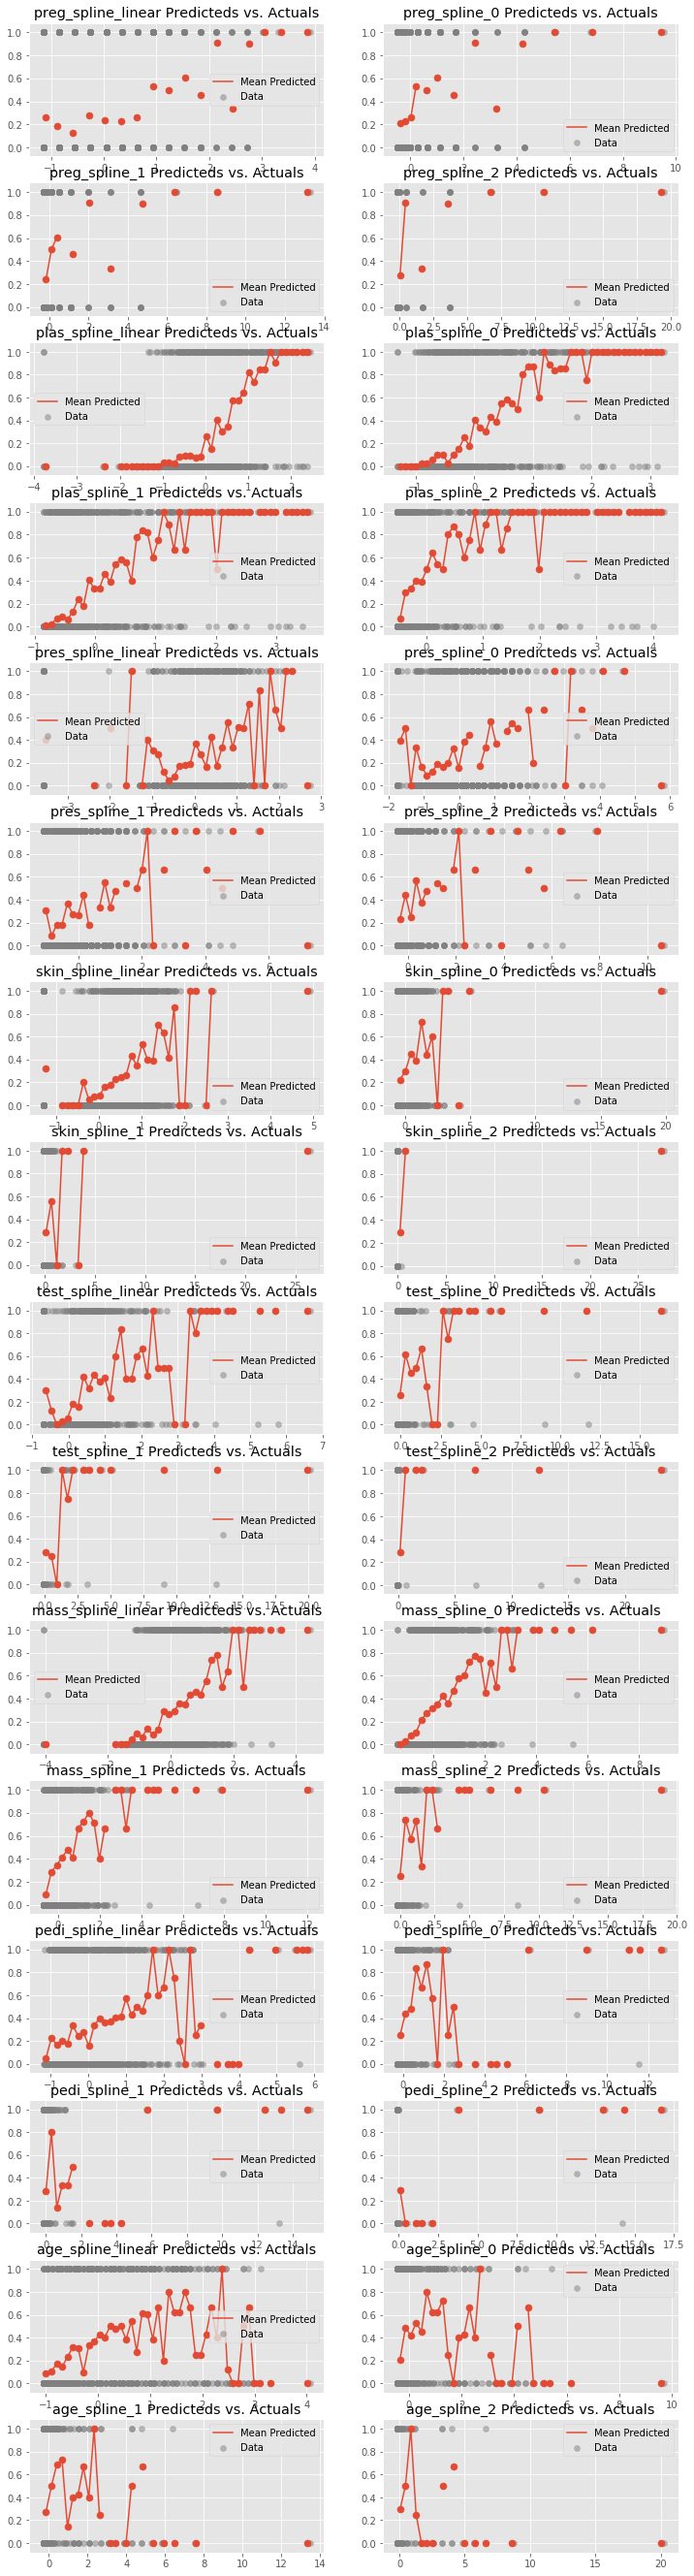

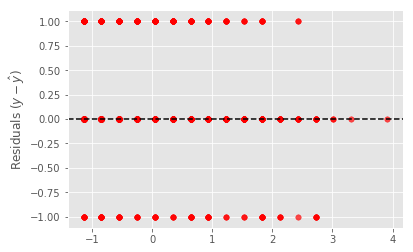

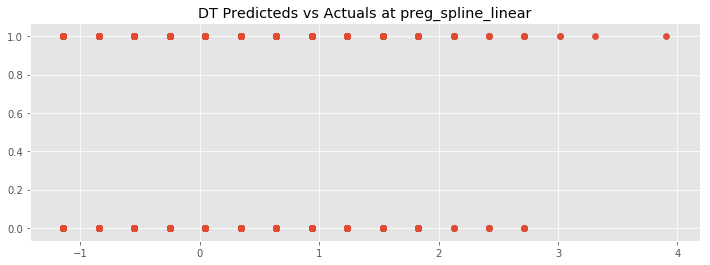

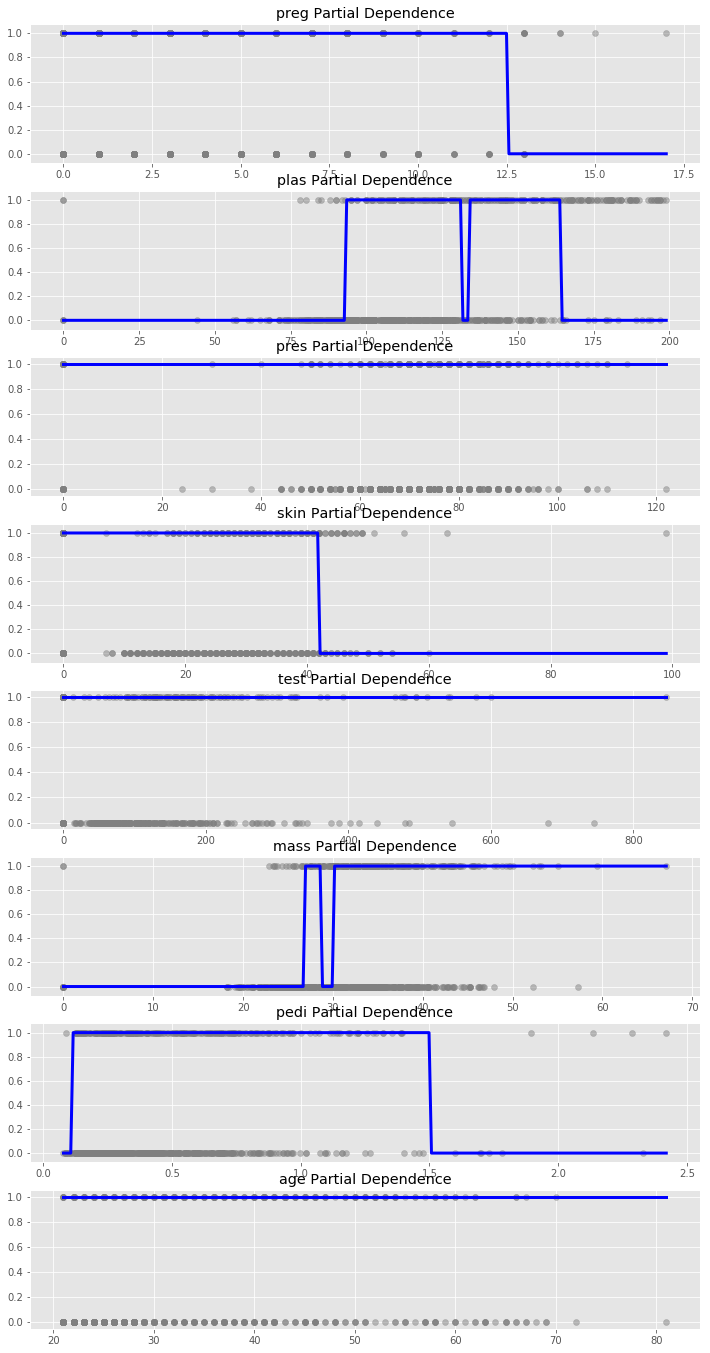

100%|██████████| 2/2 [01:16<00:00, 38.36s/it]

DT: MSE = 0.11848958333333333


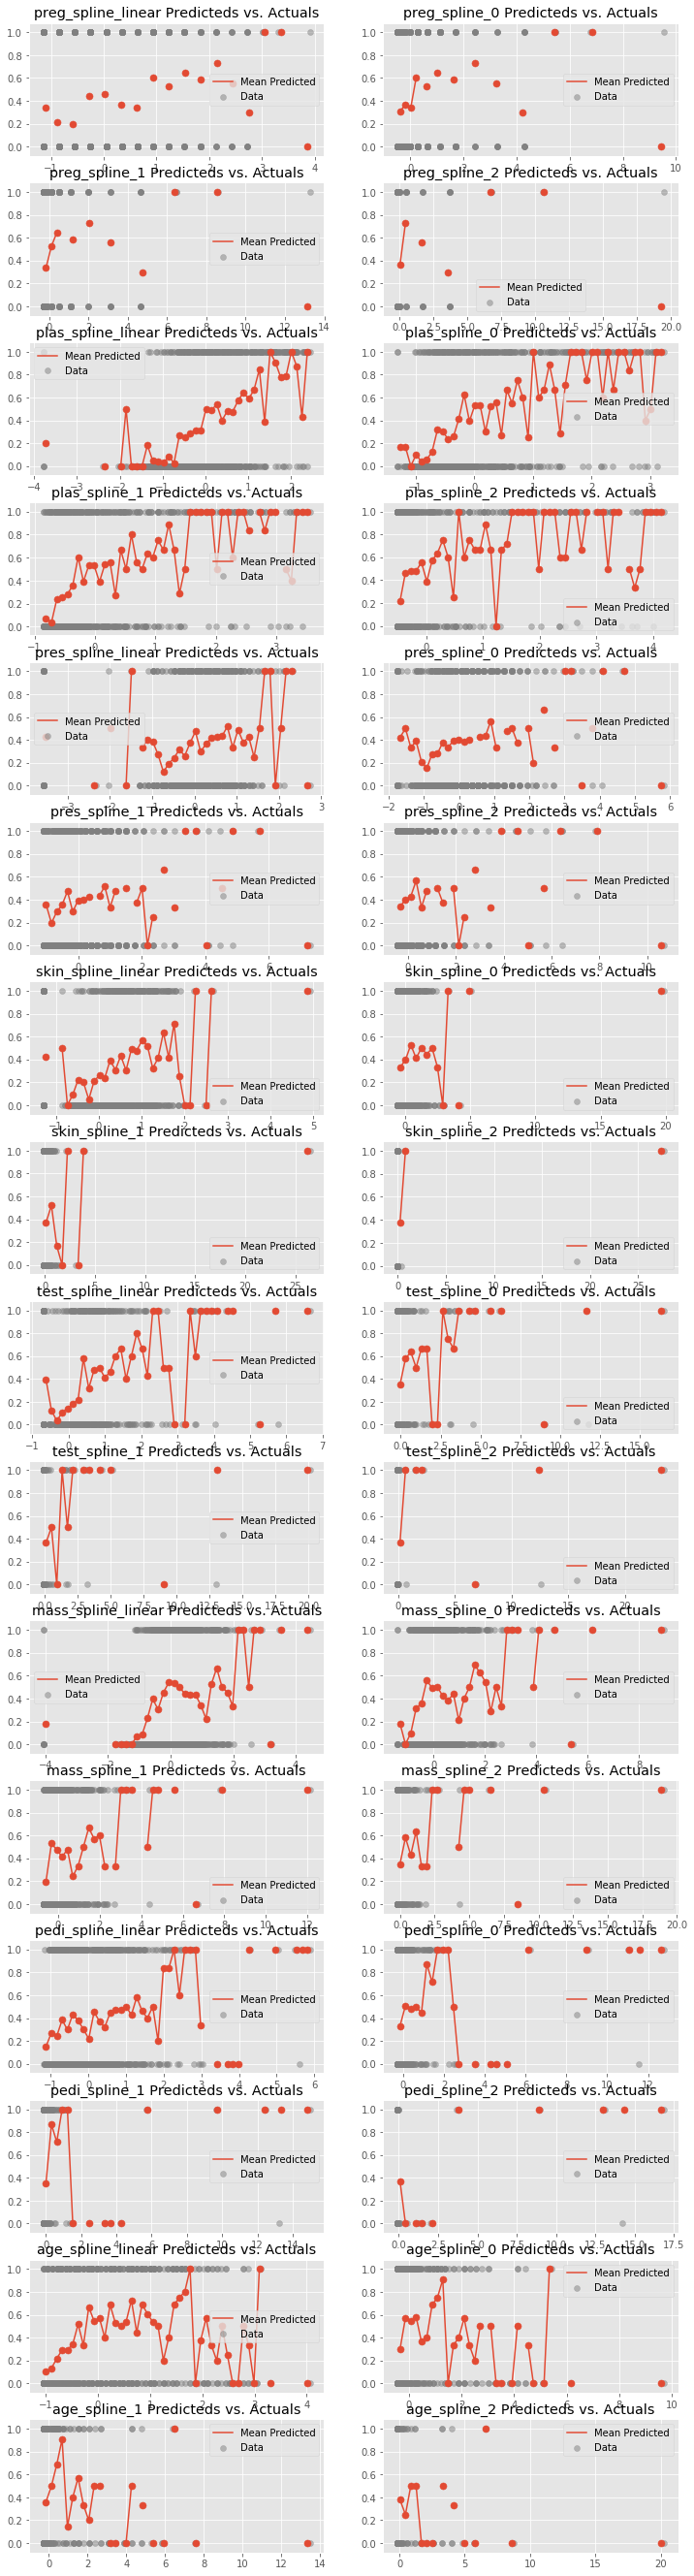

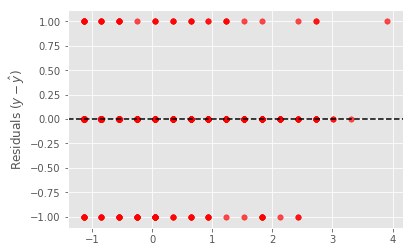

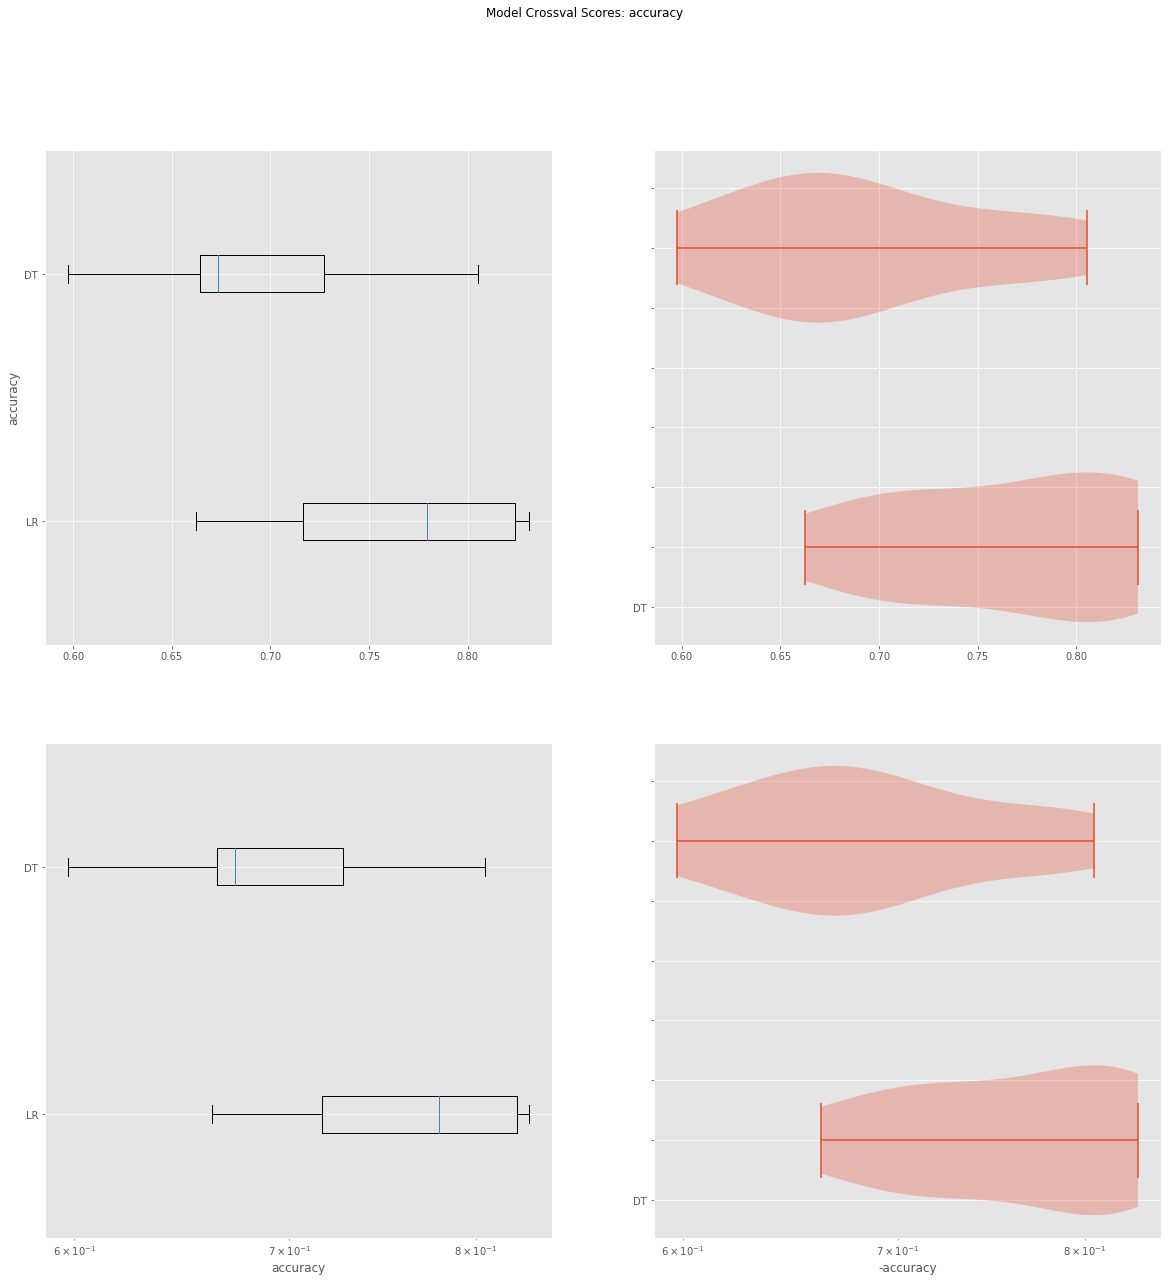

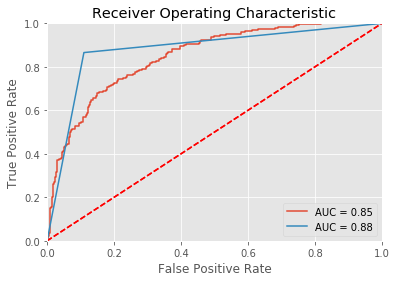

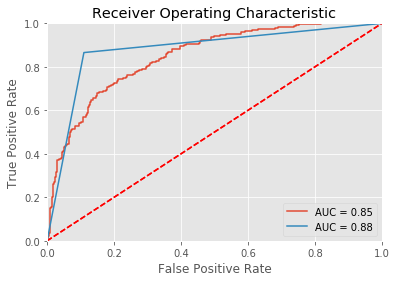

In [269]:
names2, results2, models2, pipeline2 = autoregression.compare_predictions(df, 'class', univariates=False)

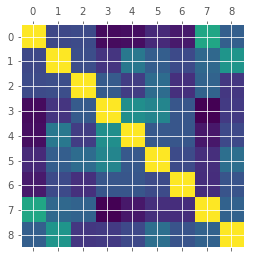

In [278]:
plt.matshow(df.corr())

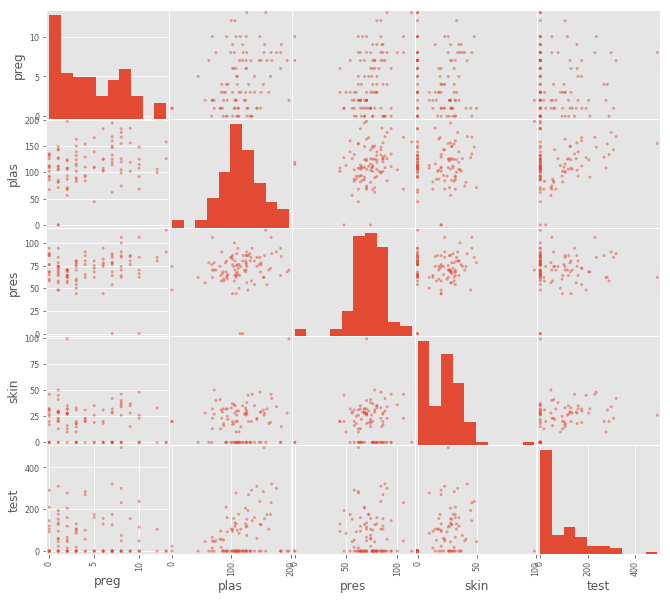

In [296]:
(continuous_features, category_features) = autoregression.sort_features(df)
if len(continuous_features)>15:
    df_graphable = df[continuous_features[:15]].sample(n=1000)
    print('More continuous features than are graphable in scatter_matrix')
pd.scatter_matrix(df_graphable, figsize=(len(df_graphable)*.11,len(df_graphable)*.1))
plt.show()

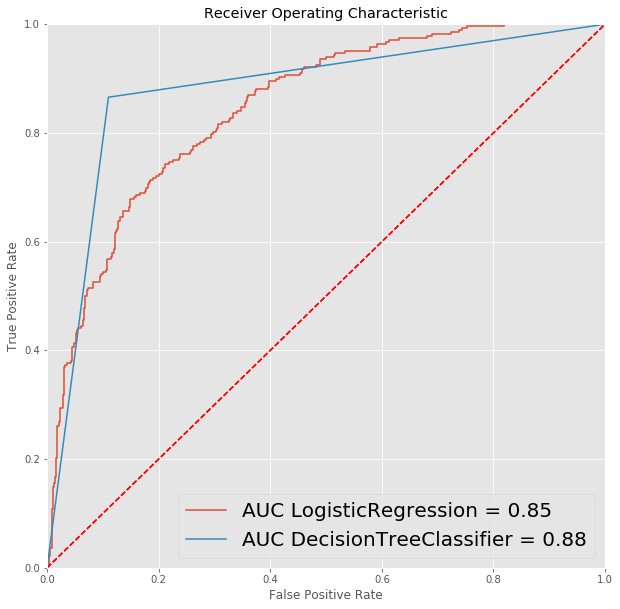

In [277]:
# def plot_roc(model, df_X, y, pipeline=None):
#     # calculate the fpr and tpr for all thresholds of the classification
#     if pipeline:
#         probs = model.predict_proba(pipeline.transform(df_X))
#     else:
#         probs = model.predict_proba(df_X)
#     preds = probs[:,1]
#     fpr, tpr, threshold = roc_curve(y, preds)
#     roc_auc = auc(fpr, tpr)
    
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# make_roc(df_X=df.drop('class', axis=1), y=df['class'], model=models2[0][1], pipeline=pipeline2)

# def plot_rocs(models, df_X, y, pipeline=None):
#     fig, ax = plt.subplots(1,1)
#     for model in models:
#          galgraphs.plot_roc(ax, model, df_X, y, pipeline)
galgraphs.plot_rocs(models2, df_X=df.drop('class', axis=1), y=df['class'], pipeline=pipeline2)

# Random Uniform Line with Jitter

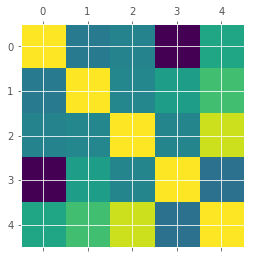

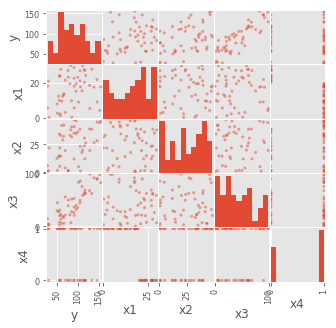

0it [00:00, ?it/s]

df columns: ['x1', 'x2', 'x3', 'x4', 'y']
df columns after transform: ['x1_spline_linear', 'x1_spline_0', 'x1_spline_1', 'x1_spline_2', 'x2_spline_linear', 'x2_spline_0', 'x2_spline_1', 'x2_spline_2', 'x3_spline_linear', 'x3_spline_0', 'x3_spline_1', 'x3_spline_2', 'x4_spline_linear', 'x4_spline_0', 'x4_spline_1', 'x4_spline_2', 'y']
y variable: "y" is continuous


13it [00:08,  1.46it/s]


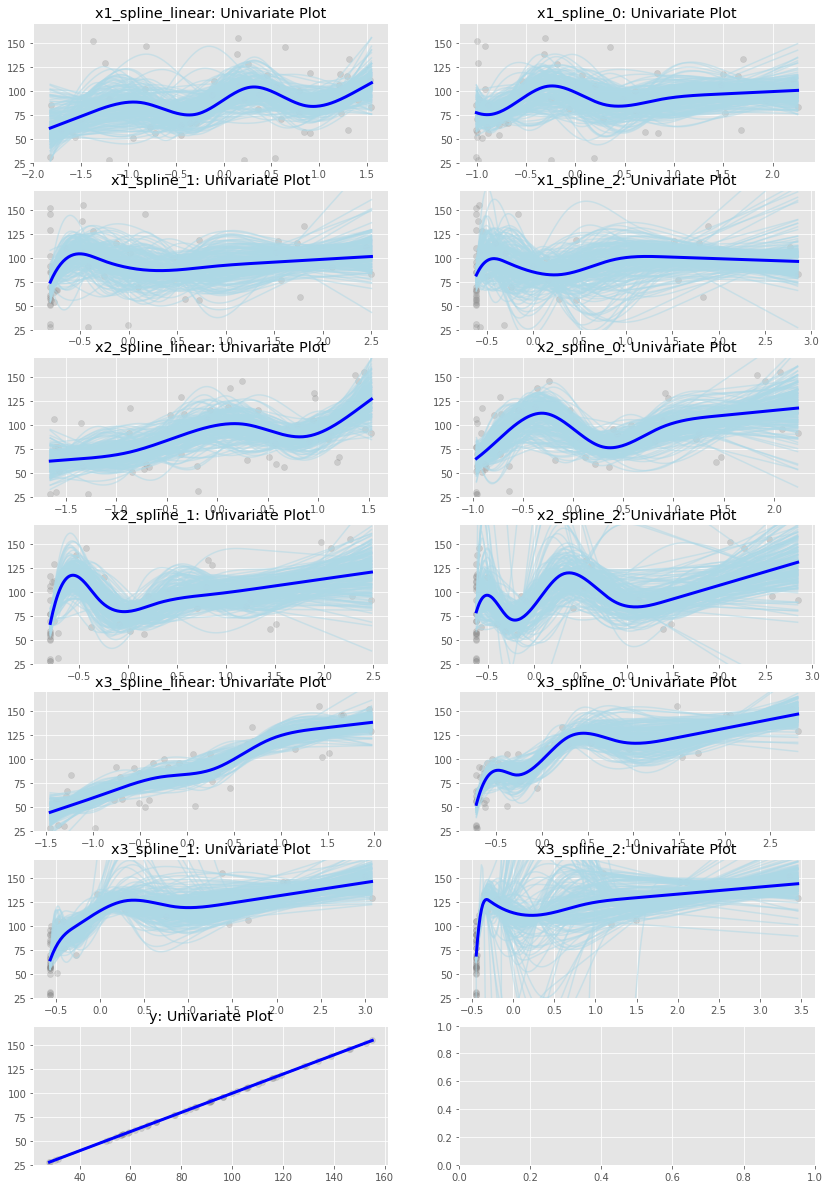

  0%|          | 0/2 [00:00<?, ?it/s]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LR: mean=-8.112281 std=3.942864


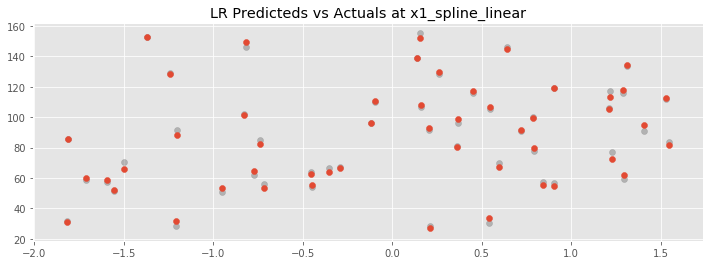

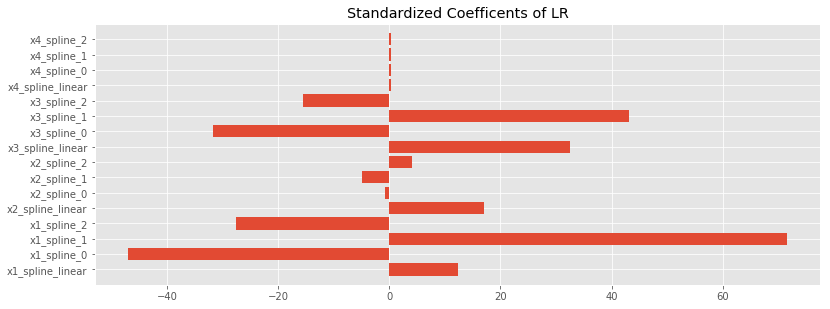

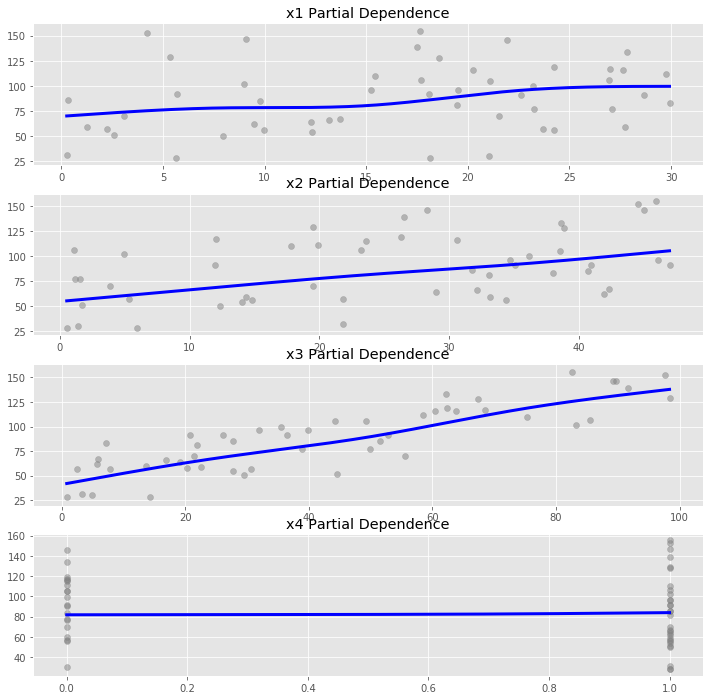

 50%|█████     | 1/2 [00:08<00:08,  8.88s/it]

LR: MSE = 8.377162050276697
RidgeCV(alphas=array([  1.00000e-04,   1.11111e+03,   2.22222e+03,   3.33333e+03,
         4.44444e+03,   5.55556e+03,   6.66667e+03,   7.77778e+03,
         8.88889e+03,   1.00000e+04]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
RR: mean=-8.103063 std=3.920280


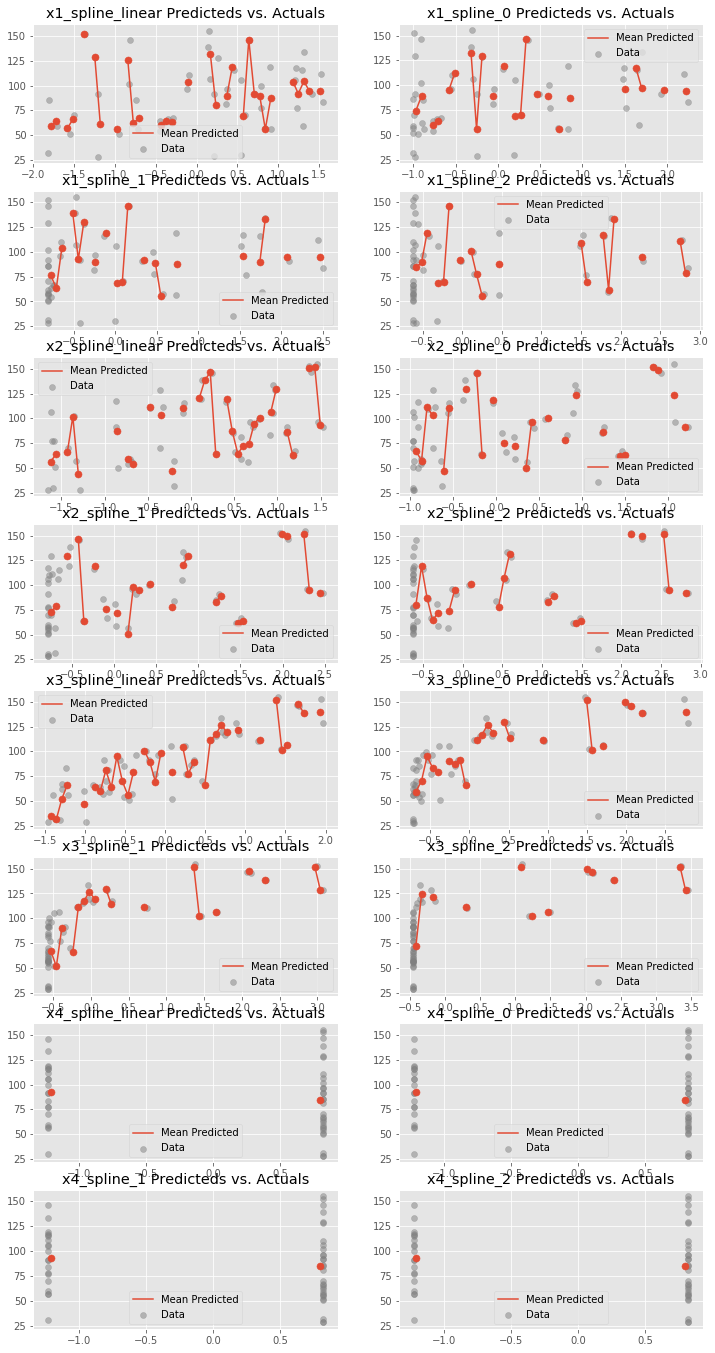

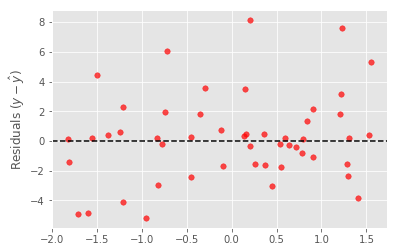

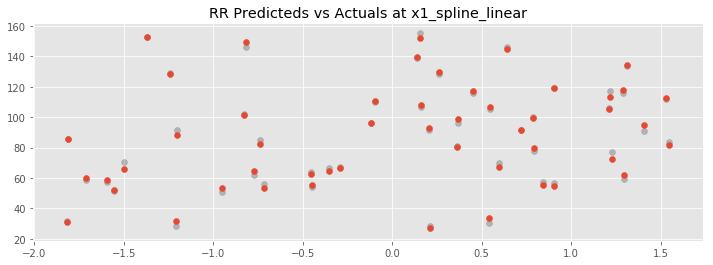

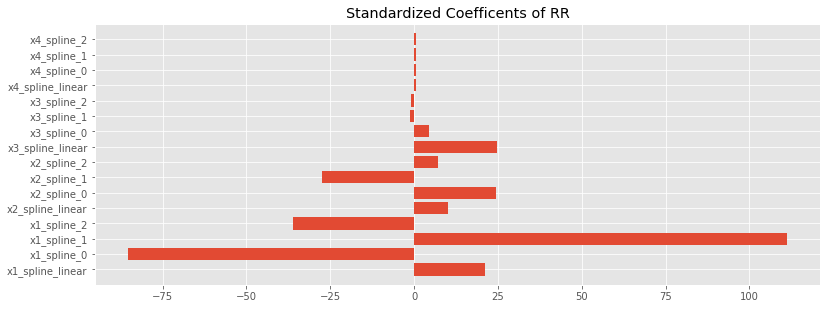

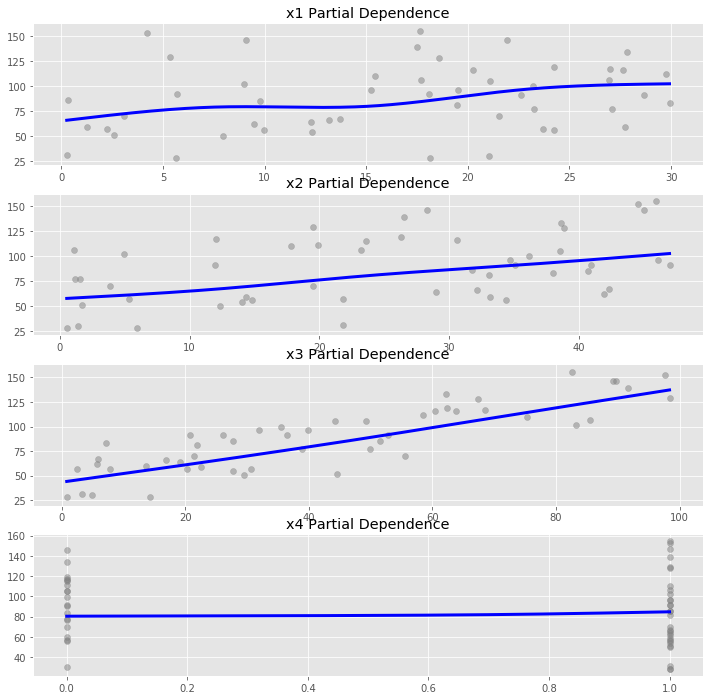

100%|██████████| 2/2 [00:20<00:00, 10.37s/it]

RR: MSE = 6.682852712450784


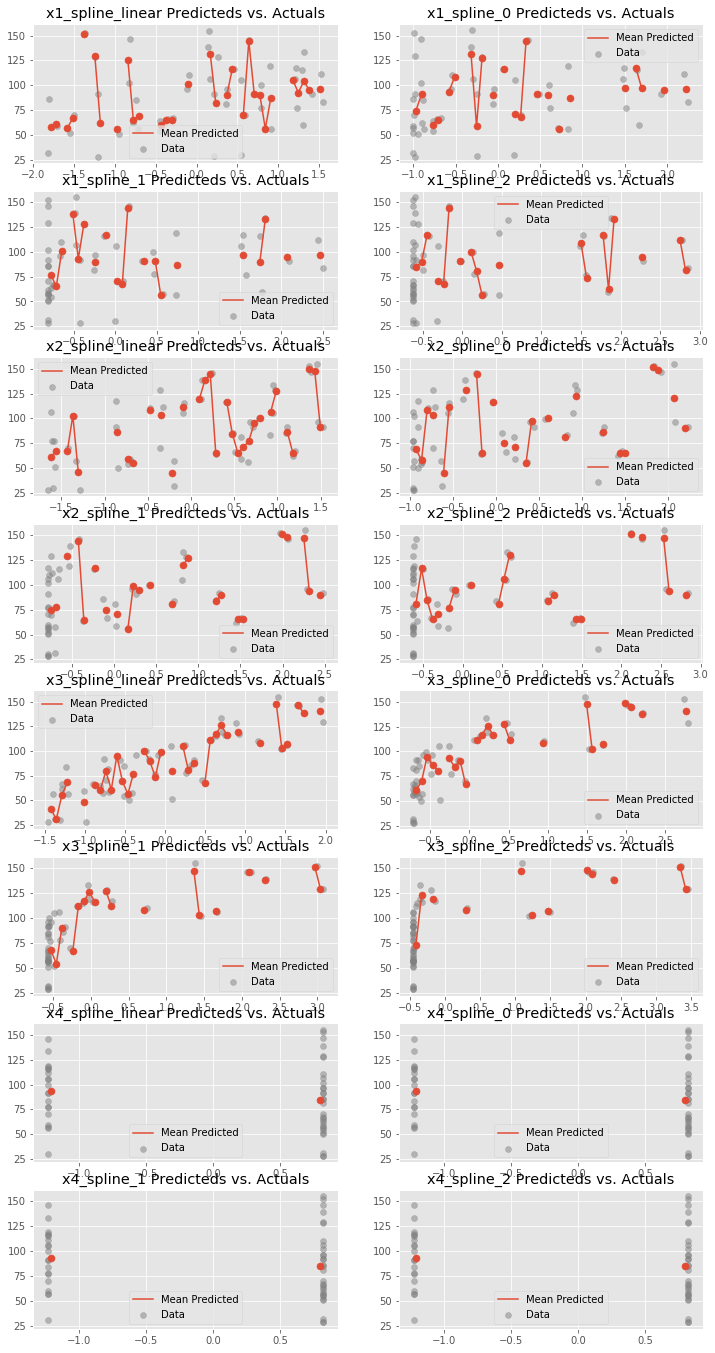

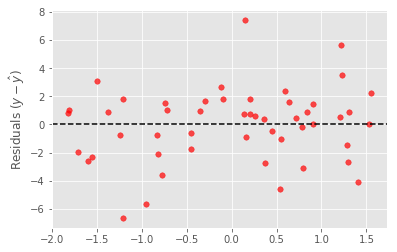

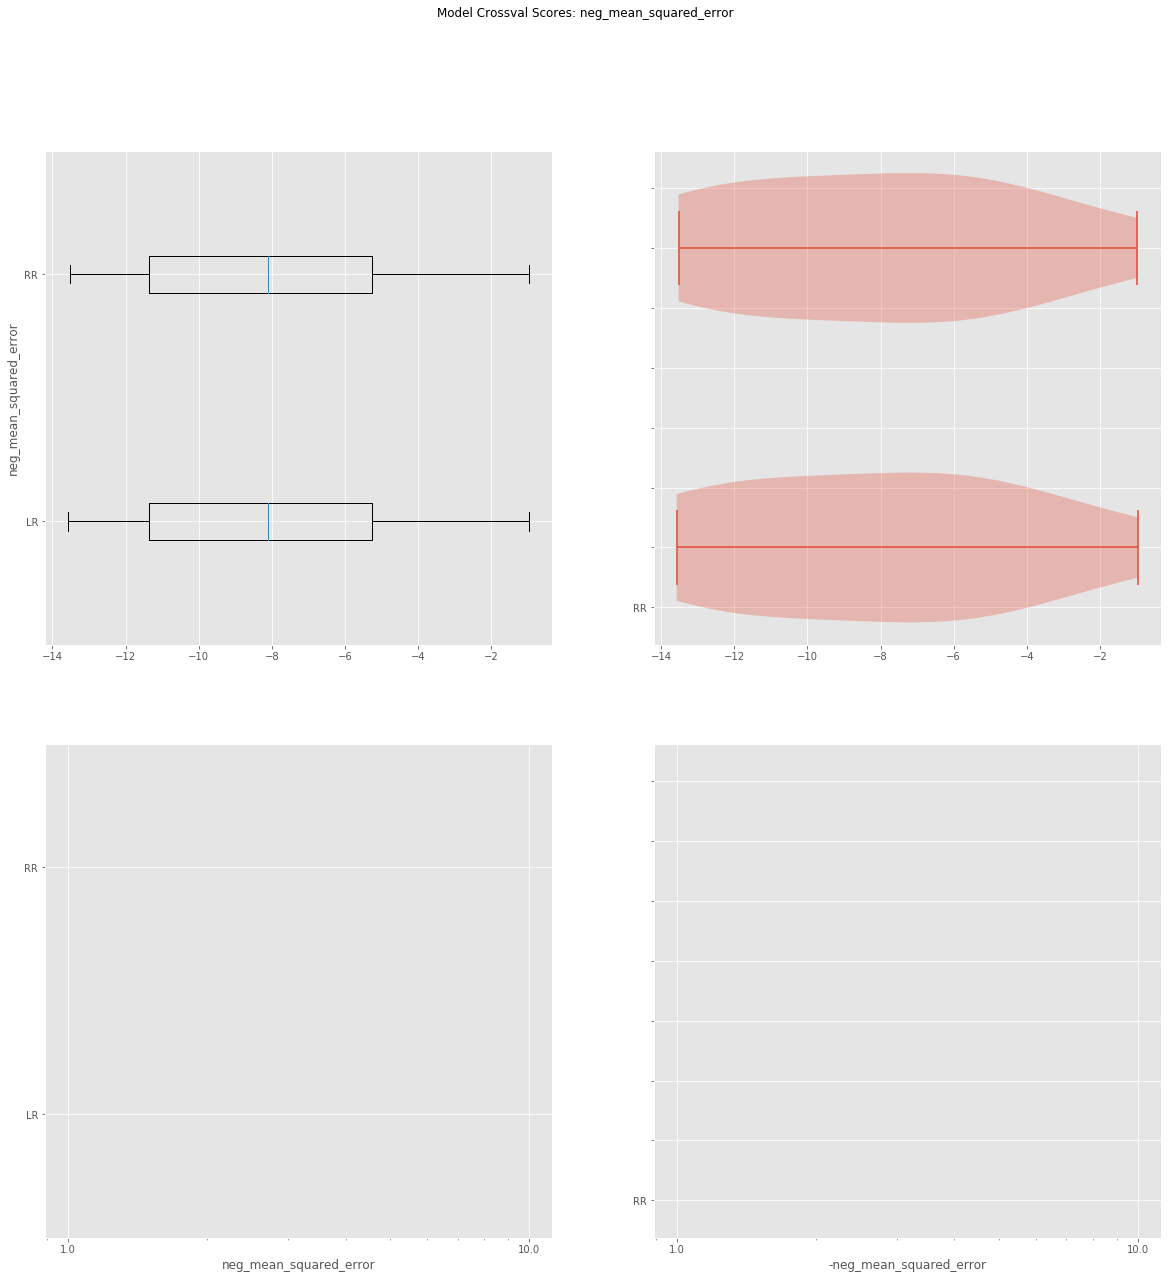

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

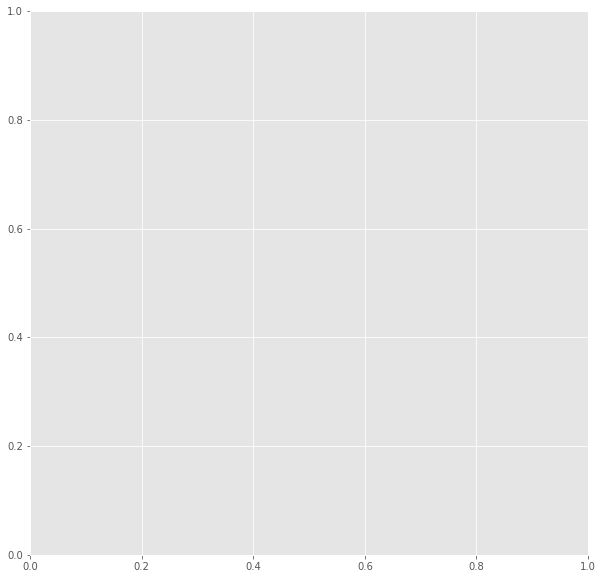

In [303]:
import random
# balance_real = pd.read_csv("/Users/macbookpro/Dropbox/Galvanize/dsi-practical-linear-regression/data/balance.csv", index_col=0)
# iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

x1 = np.random.uniform(0,30,50)
x2 = np.random.uniform(0,50,50)
x3 = np.random.uniform(0,100,50)
y = x1 + x2 + x3 + np.random.uniform(0.0, 10, size=len(x1))
data = np.zeros((len(x1),4))
data[:,0] = x1
for i, col in enumerate([x1,x2,x3,y]):
    data[:,i] = col
df = pd.DataFrame(data, columns = ['x1','x2','x3','y'])
df['x4'] = df['x1']< 20
df['x4']=df['x4'].astype('float')
names3, results3, models3, pipeline3 = autoregression.compare_predictions(df,'y')

In [194]:
models2

[('LR',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 ('RR',
  RidgeCV(alphas=array([  1.00000e-04,   1.11111e+03,   2.22222e+03,   3.33333e+03,
           4.44444e+03,   5.55556e+03,   6.66667e+03,   7.77778e+03,
           8.88889e+03,   1.00000e+04]),
      cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
      scoring=None, store_cv_values=False))]

In [306]:
is_continuous=True
if not is_continuous:
    print('Not continuosu')

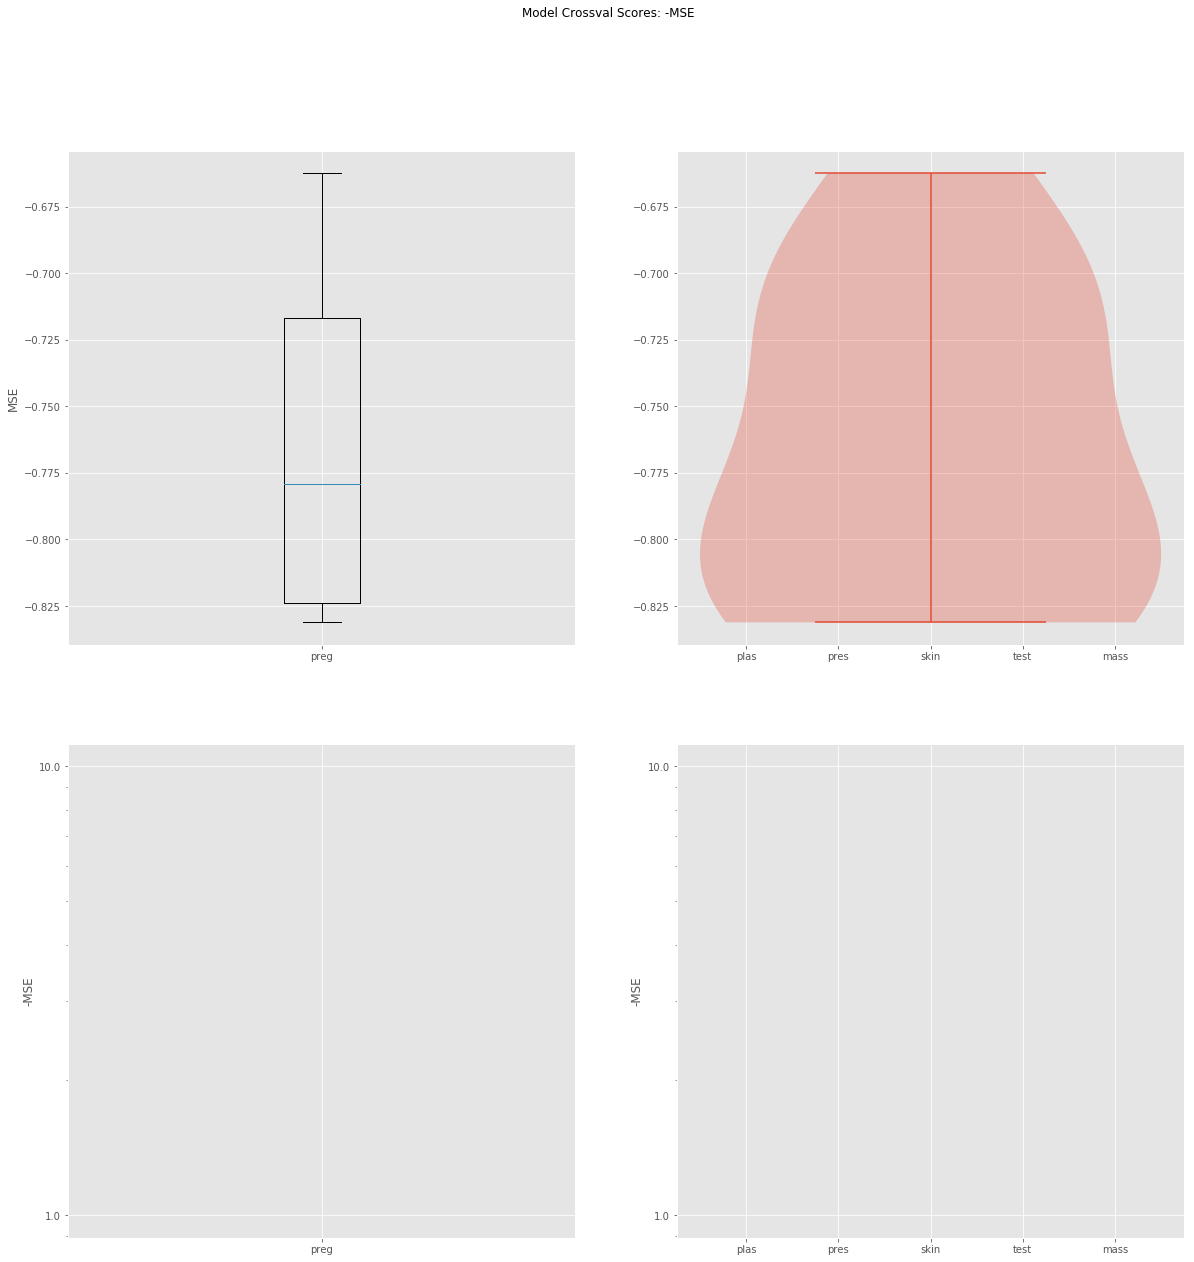

In [186]:
results= results2
scoring = 'MSE'

negresults = []
for i, result in enumerate(results):
    negresults.append(-1*result)
    
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: -{scoring}')
ax[0].set_ylabel(f'{scoring}')

import matplotlib
# BOX PLOTS
ax[0].boxplot(negresults)
ax[0].set_xticklabels(names)


# VIOLIN PLOTS
ax[1].violinplot(negresults)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(negresults)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'-{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(negresults)
ax[3].set_xticklabels(names)
ax[3].set_ylabel(f'-{scoring}')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()


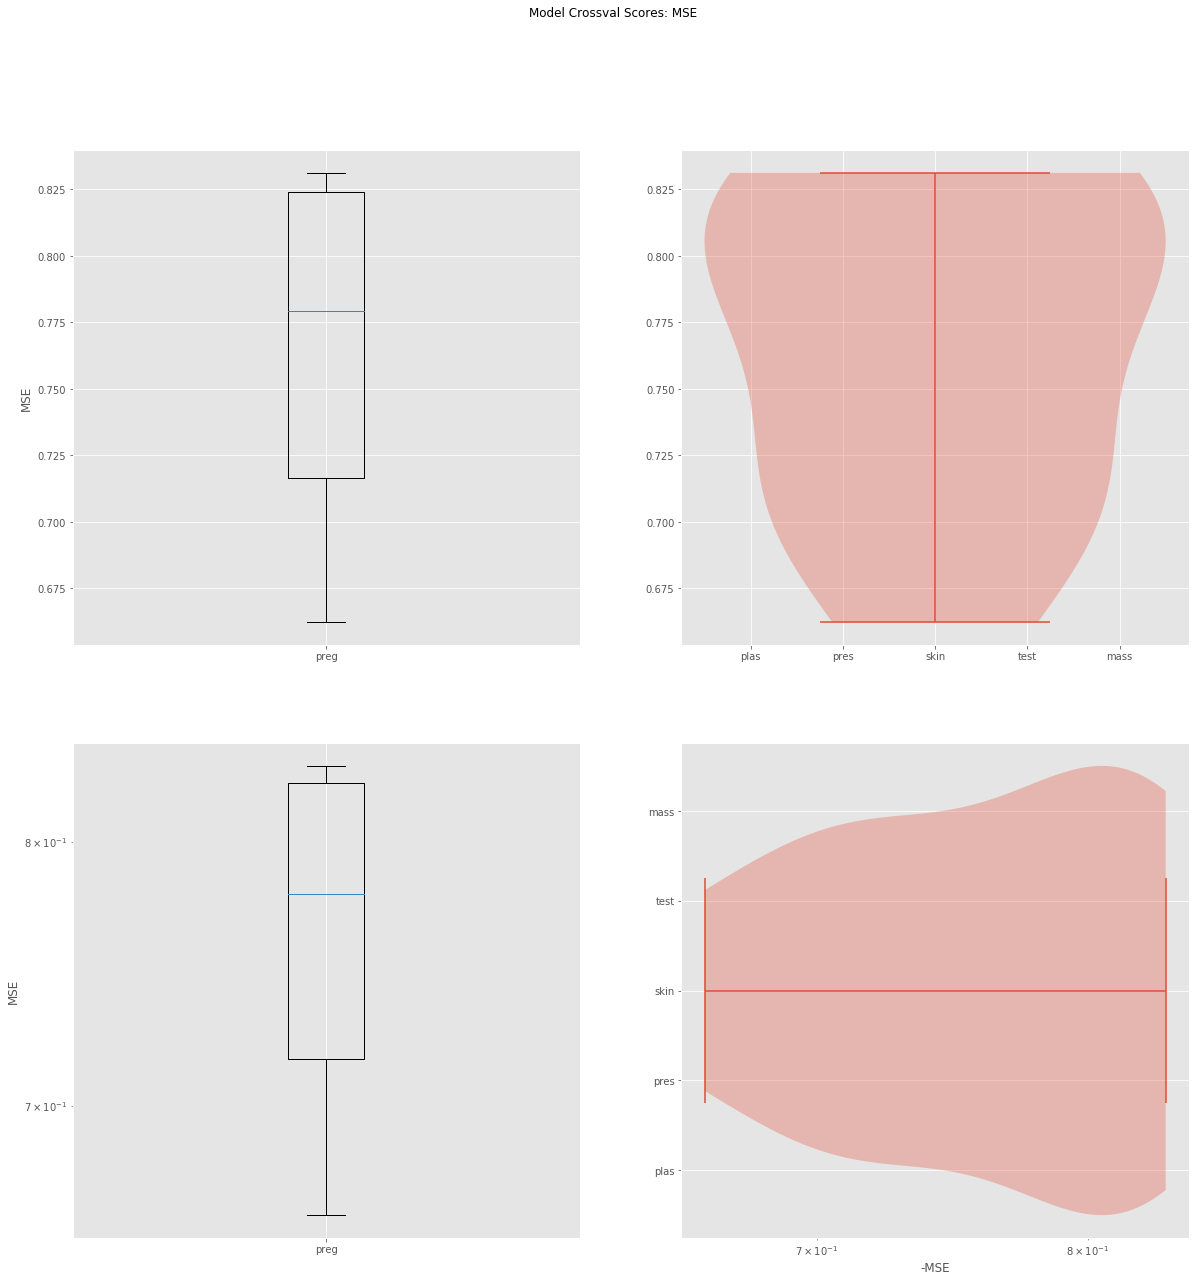

In [188]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: {scoring}')
ax[0].set_ylabel(f'{scoring}')

# BOX PLOTS
ax[0].boxplot(results)
ax[0].set_xticklabels(names)

# VIOLIN PLOTS
ax[1].violinplot(results)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(results)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(results, vert=False)
ax[3].set_yticklabels(names)
ax[3].set_xlabel(f'-{scoring}')
ax[3].set_xscale('log')
ax[3].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

# Machine sales Case study

In [133]:
import cleandata

In [299]:
def get_age_feature(df, datapoints):
    df = df.head(datapoints);
    df.saledate = pd.to_datetime(df.saledate)
    df.saledate = df.saledate.dt.year
    df['age'] = df.year_made - df.saledate
    df = df.drop('saledate', axis=1)
    df['age_too_old'] = df['age']<-500
    return df



train_datapoints=1000000
test_datapoints=100000

# GET DATA
df_Train = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Train.csv')
df_Train = cleandata.rename_columns(df_Train)
df_Train = get_age_feature(df_Train, train_datapoints)
df_Test = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Test.csv')
df_Test = cleandata.rename_columns(df_Test)
df_Test = get_age_feature(df_Test, test_datapoints)
df_Train.sale_price = np.log(df_Train.sale_price)
df_actual_answers = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/do_not_open/test_soln.csv')
df_actual_answers = df_actual_answers[0:test_datapoints];

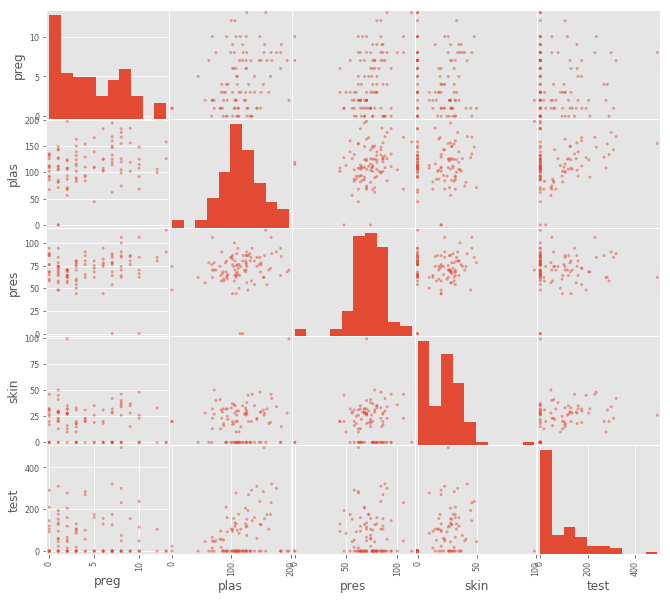

In [300]:
y_var_name = 'sale_price'
(continuous_features, category_features) = autoregression.sort_features(df_Train.sample(n=500))
if y_var_name in continuous_features:
    continuous_features.remove(y_var_name)
while 5 < len(continuous_features):
    plot_sample_df = df_Train[[y_var_name] + continuous_features[:6]].sample(n=300)
    pd.scatter_matrix(plot_sample_df, figsize=(len(plot_sample_df)*.07,len(plot_sample_df)*.07))
    continuous_features = continuous_features[5:]
plot_sample_df = df_Train[[y_var_name] + continuous_features].sample(n=300)
pd.scatter_matrix(plot_sample_df, figsize=(len(plot_sample_df)*.1,len(plot_sample_df)*.1))
plt.show()

In [179]:
df_Train.columns

Index(['sales_i_d', 'sale_price', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'fi_model_desc', 'fi_base_model', 'fi_secondary_desc',
       'fi_model_series', 'fi_model_descriptor', 'product_size',
       'fi_product_class_desc', 'state', 'product_group', 'product_group_desc',
       'drive_system', 'enclosure', 'forks', 'pad_type', 'ride_control',
       'stick', 'transmission', 'turbocharged', 'blade_extension',
       'blade_width', 'enclosure_type', 'engine_horsepower', 'hydraulics',
       'pushblock', 'ripper', 'scarifier', 'tip_control', 'tire_size',
       'coupler', 'coupler_system', 'grouser_tracks', 'hydraulics_flow',
       'track_type', 'undercarriage_pad_width', 'stick_length', 'thumb',
       'pattern_changer', 'grouser_type', 'backhoe_mounting', 'blade_type',
       'travel_controls', 'differential_type', 'steering_controls', 'age',
       'age_too_old'],
      dtype='object')

In [172]:
df_Train = df_Train[['sales_i_d', 'sale_price', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

In [175]:
df_Test = df_Test[['sales_i_d', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

'percent_data' NOT SPECIFIED AND len(df)=(401125) IS > 1000: TAKING A RANDOM %10 OF THE SAMPLE
'percent_data' NOT SPECIFIED AND len(df)=(40112) IS > 1000: TAKING A RANDOM %10 OF THE SAMPLE
'percent_data' NOT SPECIFIED AND len(df)=(4011) IS > 1000: TAKING A RANDOM %10 OF THE SAMPLE
Too many unique values in categorical feature "usage_band", dropping "usage_band"
Too many unique values in categorical feature "fi_model_desc", dropping "fi_model_desc"
Too many unique values in categorical feature "fi_base_model", dropping "fi_base_model"
Too many unique values in categorical feature "fi_secondary_desc", dropping "fi_secondary_desc"
Too many unique values in categorical feature "fi_model_series", dropping "fi_model_series"
Too many unique values in categorical feature "fi_model_descriptor", dropping "fi_model_descriptor"
Too many unique values in categorical feature "product_size", dropping "product_size"
Too many unique values in categorical feature "fi_product_class_desc", dropping "fi_pr

  0%|          | 0/7 [00:00<?, ?it/s]

df columns after transform: ['sales_i_d_spline_linear', 'sales_i_d_spline_0', 'sales_i_d_spline_1', 'sales_i_d_spline_2', 'machine_i_d_spline_linear', 'machine_i_d_spline_0', 'machine_i_d_spline_1', 'machine_i_d_spline_2', 'model_i_d_spline_linear', 'model_i_d_spline_0', 'model_i_d_spline_1', 'model_i_d_spline_2', 'datasource_spline_linear', 'datasource_spline_0', 'datasource_spline_1', 'datasource_spline_2', 'auctioneer_i_d_spline_linear', 'auctioneer_i_d_spline_0', 'auctioneer_i_d_spline_1', 'auctioneer_i_d_spline_2', 'year_made_spline_linear', 'year_made_spline_0', 'year_made_spline_1', 'year_made_spline_2', 'machine_hours_current_meter_spline_linear', 'machine_hours_current_meter_spline_0', 'machine_hours_current_meter_spline_1', 'machine_hours_current_meter_spline_2', 'age_spline_linear', 'age_spline_0', 'age_spline_1', 'age_spline_2', 'usage_band_was_null_category', 'usage_band_Low_category', 'usage_band_Medium_category', 'usage_band_High_category', 'fi_model_desc_320L_category',

LR: mean=-1487834.591505 std=4377702.891736


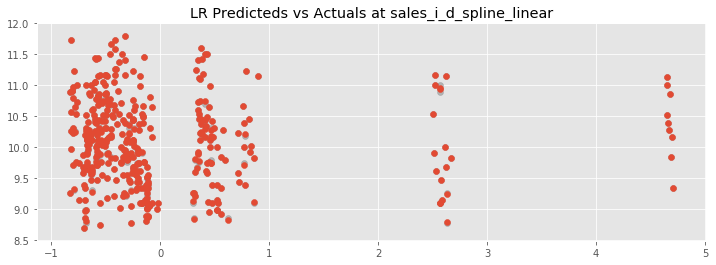

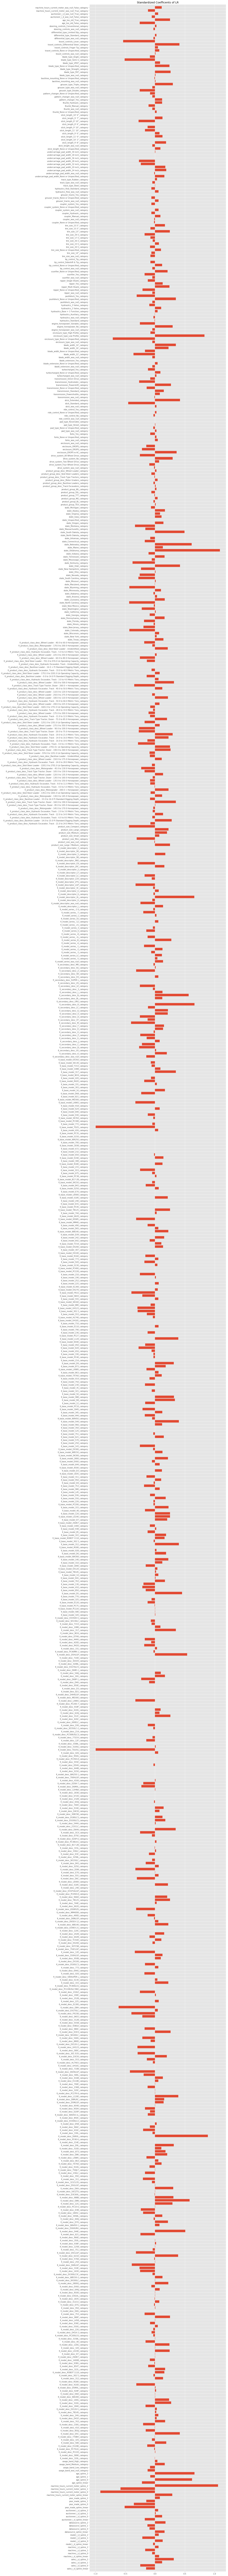

TypeError: '>' not supported between instances of 'str' and 'float'

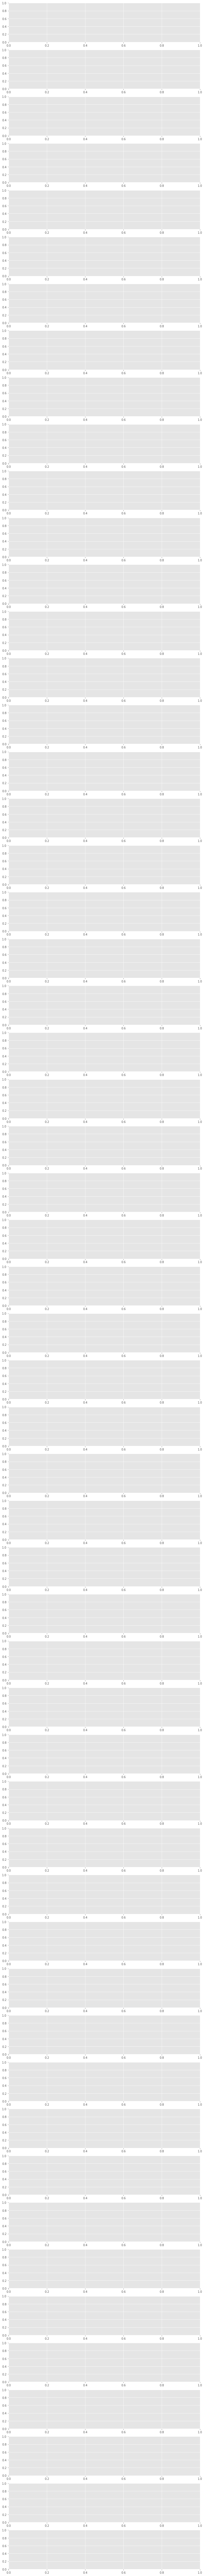

In [180]:
namesBIG, resultsBIG, modelsBIG, pipelineBIG = autoregression.compare_predictions(df=df_Train, y_var_name="sale_price", knots=5, univariates=False)

In [ ]:
names, results, models, pipeline = autoregression.compare_predictions(df=df_Train.head(100), y_var_name="sale_price", knots=5, univariates=True)